In [3]:
import timeit

import numpy as np

from scipy import optimize

from matplotlib import pyplot as plt

from pandas import read_csv
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler as scaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [4]:
# constants

PATH = './data/cancer_1M.csv'
BATCH_SIZE = 5000

In [5]:
results = {}

(1000302, 32)
<bound method NDFrame.describe of          patient_id     x1     x2      x3      x4     x5     x6     x7     x8  \
0               352  15.75  19.22  107.10   758.6  0.124  0.236  0.291  0.124   
1               105  10.49  19.29   67.41   336.1  0.100  0.086  0.030  0.012   
2               375  13.69  16.07   87.84   579.1  0.083  0.064  0.026  0.020   
3               530  12.07  13.44   77.83   445.2  0.110  0.090  0.038  0.028   
4               298  11.76  18.14   75.00   431.1  0.100  0.059  0.027  0.035   
...             ...    ...    ...     ...     ...    ...    ...    ...    ...   
1000297         299  14.26  18.17   91.22   633.1  0.066  0.052  0.025  0.014   
1000298         380  11.08  18.83   73.30   361.6  0.122  0.215  0.169  0.064   
1000299         244  13.75  23.77   88.54   590.0  0.080  0.068  0.047  0.023   
1000300          43  19.07  24.81  128.30  1104.0  0.091  0.219  0.211  0.100   
1000301          66  14.78  23.94   97.40   668.3  0.117  0.1

C:\Users\Vedant\AppData\Local\Temp/ipykernel_42632/3792785611.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax=ax)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

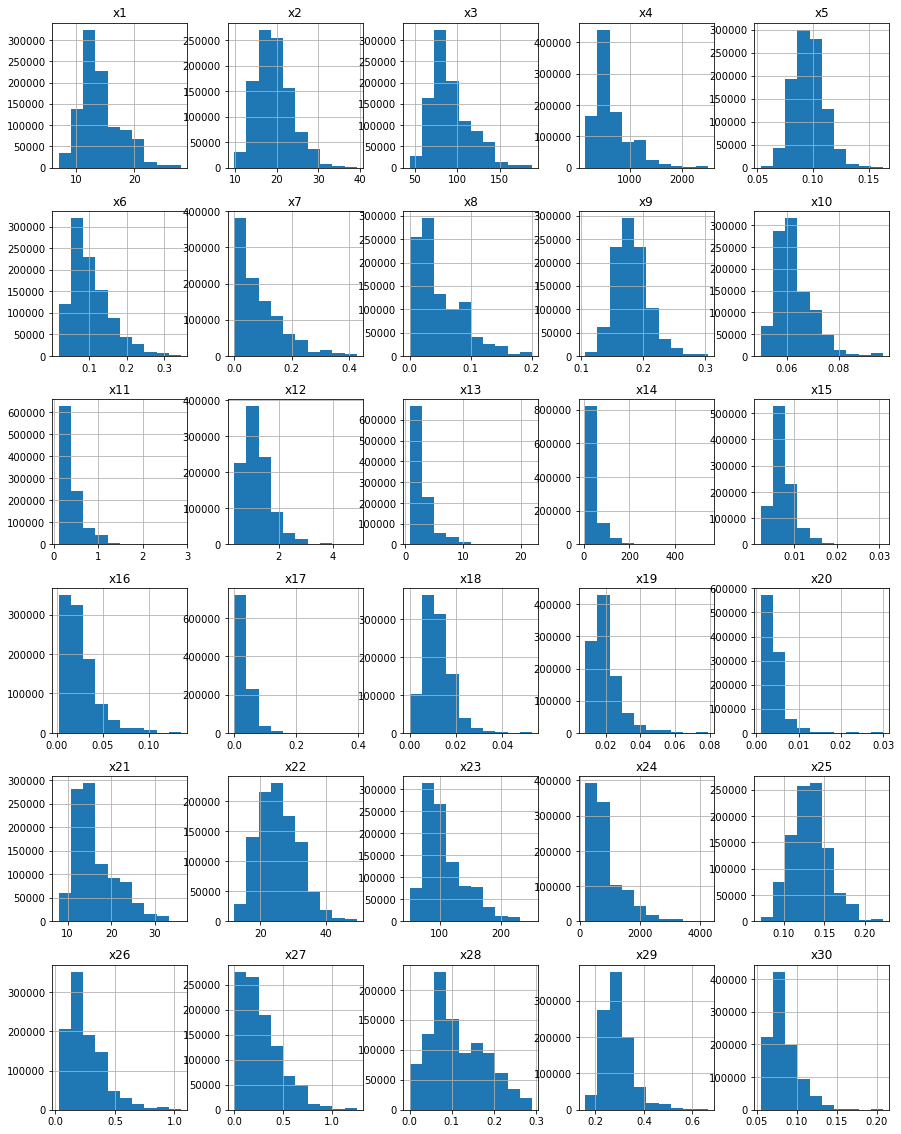

In [6]:
df = read_csv(PATH)

print(df.shape)
print(df.describe)

X, y = df.iloc[:, 1:-1], df.iloc[:, [-1]]

fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
X.hist(ax=ax)


### Preprocessing

(1000302, 30)
<bound method NDFrame.describe of                x1        x2        x3        x4        x5        x6        x7  \
0        0.460872 -0.016208  0.623248  0.294964  1.961285  2.493400  2.537964   
1       -1.033042  0.000082 -1.011592 -0.906669  0.255342 -0.348105 -0.738749   
2       -0.124197 -0.749234 -0.170076 -0.215552 -0.953035 -0.764859 -0.788967   
3       -0.584300 -1.361252 -0.582390 -0.596377  0.966152 -0.272332 -0.638314   
4       -0.672344 -0.267531 -0.698958 -0.636479  0.255342 -0.859576 -0.776413   
...           ...       ...       ...       ...       ...       ...       ...   
1000297  0.037691 -0.260550 -0.030853 -0.061970 -2.161411 -0.992180 -0.801522   
1000298 -0.865474 -0.106963 -0.768981 -0.834144  1.819123  2.095589  1.006320   
1000299 -0.107156  1.042608 -0.141243 -0.184551 -1.166278 -0.689086 -0.525324   
1000300  1.403799  1.284623  1.496480  1.277317 -0.384387  2.171363  1.533608   
1000301  0.185378  1.082168  0.223703  0.038142  1.463718  0.

C:\Users\Vedant\AppData\Local\Temp/ipykernel_42632/23610819.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scaled_X.hist(ax=ax)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

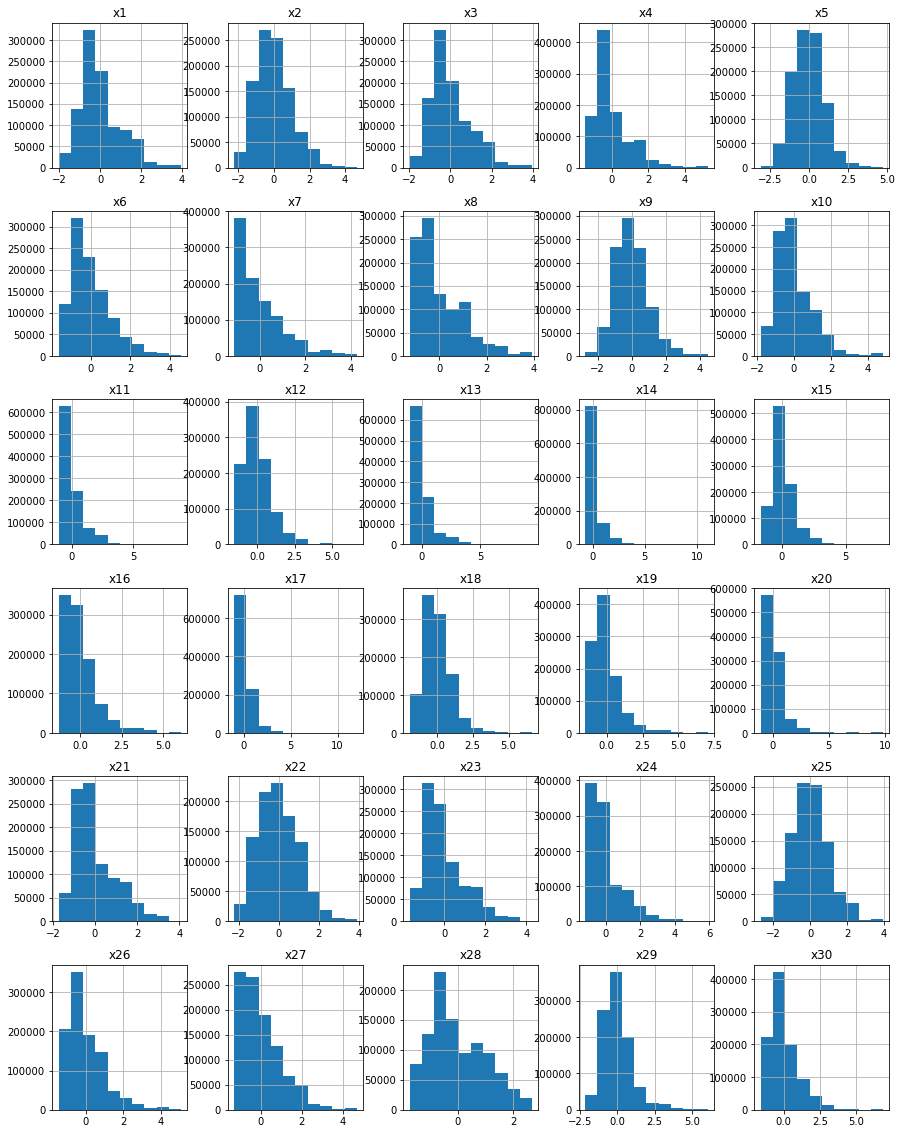

In [7]:
scaled = scaler().fit_transform(X)
scaled_X = DataFrame(scaled, columns=X.columns)

print(scaled_X.shape)
print(scaled_X.describe)

fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
scaled_X.hist(ax=ax)


### Built-in methods

In [8]:
start_time = timeit.default_timer()

pca = PCA(n_components=6)
pca_X = pca.fit_transform(scaled_X)
pca_df_X = DataFrame(pca_X)

results['builtin_pca_time'] = timeit.default_timer() - start_time

print(pca_df_X.shape)
print(pca_df_X.describe)


(1000302, 6)
<bound method NDFrame.describe of                 0         1         2         3         4         5
0        6.161530  5.045744  0.451845  0.955195 -0.566692  2.504994
1       -2.689911  1.419035  0.968645  0.016409 -1.318857  0.900066
2       -2.624027 -1.138342 -1.310405  0.901158  0.389368  1.598102
3       -2.463402  0.564137 -1.223546  2.194207 -0.695962 -0.792563
4       -2.377876 -0.764903  2.032544  0.074531 -0.544756 -1.039788
...           ...       ...       ...       ...       ...       ...
1000297 -2.778793 -2.533419 -0.903281 -0.262443  1.659328  0.954891
1000298  3.725406  5.911725 -4.973746 -1.147633 -0.593473 -0.889875
1000299 -1.863915 -1.641895  1.234183 -0.797724  0.756839  1.641064
1000300  9.086410  2.060891  2.202227 -1.025957  0.815445  4.230703
1000301  1.804473  0.740624 -1.442198 -1.204829 -1.465823 -0.751006

[1000302 rows x 6 columns]>


In [9]:
X_train, X_test, y_train, y_test = train_test_split(pca_df_X, y, test_size=0.20, random_state=0)

start_time = timeit.default_timer()

lr_model = LogisticRegression()
lr_model.fit(X_train.values, y_train.values)

results['builtin_lr_time'] = timeit.default_timer() - start_time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.9736580342995387


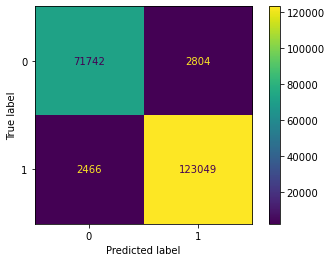

In [10]:
predictions = lr_model.predict(X_test.values)

results['builtin_lr_accuracy'] = lr_model.score(X_test.values, y_test.values)
results['builtin_lr_predictions'] = predictions

ConfusionMatrixDisplay.from_predictions(y_test.values, predictions)
print(f"Accuracy = {lr_model.score(X_test.values, y_test.values)}")


### Manual Implementation

In [11]:
#gamma matrix calculation

def Z(X, y=None):
    #assume that X is an n x d dataset (n rows of observations, d columns of features) and Y (output) is the last column in dataset
    Z = X.copy().T
    row_1 = np.ones(Z.shape[1])
    row_y = y.T[0] if y is not None else np.zeros(Z.shape[1])
    Z = np.insert(Z, 0, row_1, axis=0)
    Z = np.insert(Z, Z.shape[0], row_y, axis=0)
    return Z
def gamma(X, y=None):
    z = Z(X, y)
    gamma = np.dot(z, z.T)
    return gamma
def k_gamma(gamma):
    d = len(gamma) - 2
    l = L(gamma)
    q = Q(gamma)
    k_g = np.zeros((d+1, d+1))
    k_g[0, 0] = gamma[0, 0]
    k_g[1:, 0] = l
    k_g[0, 1:] = np.transpose(l)
    for i in range(d):
        k_g[i+1, i+1] = q[i, i]
    return k_g
def L(gamma):
    d = len(gamma) - 2
    return gamma[1:d+1, 0]
def Q(gamma):
    d = gamma.shape[1] - 2
    return gamma[1:d+1, 1:d+1]
#if working in chunks, intermediate gammas should be d x d in size according to paper.
def update_gamma(old_gamma, new_gamma):
    return np.add(old_gamma, new_gamma)

In [12]:
# PCA

def pca(gamma, ev_threshold=1.00):

    n = int(gamma[0][0])
    q = Q(gamma)
    l = L(gamma)

    corr_mat = np.zeros(q.shape)

    for a in range(q.shape[0]):
        for b in range(q.shape[1]):
            corr_mat[a][b] = ((n * q[a][b]) - (l[a] * l[b])) / (
                np.sqrt((n * q[a][a]) - (l[a] ** 2)) * np.sqrt((n * q[b][b]) - (l[b] ** 2)))

    # eigenvectors and eigenvalues
    U = np.zeros(n)
    S = np.zeros(n)

    U, S, V = np.linalg.svd(corr_mat)

    principal_comps = [dim for dim, ev in enumerate(S) if ev >= ev_threshold]

    return U[principal_comps]


def dim_reduction(X, U):
    return np.matmul(X, U.T)


In [13]:
# Class Decomposition using K-Means

def init_centroids(X, k):
    # randomly select k data points as initial centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    return centroids


def find_closest_centroid(x, centroids):
    J = [np.dot((x - centroid).T, (x - centroid)) for centroid in centroids]

    return np.argmin(J)


def find_closest_centroids(X, centroids):
    # for each data point in X, find the index of the closest centroid
    idx = [find_closest_centroid(x, centroids) for x in X]

    return idx


def get_mean_from_gamma(cluster):
    gamma_matrix = gamma(cluster)
    k_gamma_matrix = k_gamma(gamma_matrix)

    n = k_gamma_matrix[0, 0]
    L = k_gamma_matrix[1:, 0]

    return (L / n)


def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in np.arange(K):
        cluster = X[idx == i]
        centroids[i] = get_mean_from_gamma(cluster)

    return centroids


def run_kmeans(X, K, max_iters=10):
    # initialize the centroids
    centroids = init_centroids(X, K)

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)

        centroids = compute_means(X, idx, K)

        print(f"Iteration {i+1}")

    return idx, centroids


def fit(X, y, K, max_iters=10):
    X = np.array(X)

    # separate data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    class_0 = np.take(X, class_0_indices, axis=0)
    class_1 = np.take(X, class_1_indices, axis=0)

    model = {
        'class_0': run_kmeans(class_0, K, max_iters),
        'class_1': run_kmeans(class_1, K, max_iters)
    }

    return model


def predict(X, model):
    predictions = []

    X = np.array(X)

    for x in X:
        # find closest centroids from each class
        idx_0 = find_closest_centroid(x, model['class_0'][1])
        idx_1 = find_closest_centroid(x, model['class_1'][1])

        # predict class
        closest_centroid = find_closest_centroid(
            x, np.array([model['class_0'][1][idx_0], model['class_1'][1][idx_1]]))

        predictions.append(closest_centroid)

    return predictions


In [42]:
# loading data and computing gamma

chunks = read_csv(PATH, chunksize=BATCH_SIZE)

gamma_final = np.array([])

start_time = timeit.default_timer()

for chunk in chunks:
    X, y_chunk = chunk.iloc[:, 1:-1].to_numpy(), chunk.iloc[:, [-1]].to_numpy()

    gamma_chunk = gamma(X, y_chunk)
    gamma_final = gamma_final if gamma_final.size else np.zeros(
        gamma_chunk.shape)
    gamma_final = update_gamma(gamma_final, gamma_chunk)

print(gamma_final.shape)
print(gamma_final)


(32, 32)
[[1.00030200e+06 1.41315582e+07 1.92954740e+07 ... 2.90214156e+05
  8.39849340e+04 6.27606000e+05]
 [1.41315582e+07 2.12041483e+08 2.77493226e+08 ... 4.13563879e+06
  1.18694044e+06 7.62323122e+06]
 [1.92954740e+07 2.77493226e+08 3.90674885e+08 ... 5.62601229e+06
  1.62925707e+06 1.12434121e+07]
 ...
 [2.90214156e+05 4.13563879e+06 5.62601229e+06 ... 8.80215446e+04
  2.49675221e+04 1.69643484e+05]
 [8.39849340e+04 1.18694044e+06 1.62925707e+06 ... 2.49675221e+04
  7.37796209e+03 4.98691860e+04]
 [6.27606000e+05 7.62323122e+06 1.12434121e+07 ... 1.69643484e+05
  4.98691860e+04 6.27606000e+05]]


In [43]:
# computing PCA

ev_treshold = 1.00

pca_U = pca(gamma_final, ev_threshold=ev_treshold)

print(pca_U.shape)


(6, 30)


In [16]:
# dimensionality reduction

pca_X = dim_reduction(scaled, pca_U)
pca_df_X = DataFrame(pca_X)

results['gamma_pca_time'] = timeit.default_timer() - start_time

print(pca_df_X.shape)
print(pca_df_X.describe)


(1000302, 6)
<bound method NDFrame.describe of                 0         1         2         3         4         5
0        0.088341  0.206427  1.610018  4.182663  0.712785  2.243776
1        1.619316 -1.629092  0.776419 -0.901725  0.552506  0.640568
2        0.268395  0.079829 -0.576712 -0.679154  0.654448 -0.796928
3        0.088012 -0.456026 -0.191141 -1.529389  1.668853  0.011524
4        1.101600 -1.399399  0.068606 -1.733148 -0.819385 -0.670381
...           ...       ...       ...       ...       ...       ...
1000297  0.018243  0.228417 -0.653701 -1.040868 -0.046849 -1.572428
1000298 -3.476190 -0.874798  0.893795  3.846499  2.618512  3.489481
1000299  1.915773  0.008381  0.103338 -0.425084 -0.578529 -1.103231
1000300 -0.402051  2.036196  1.057839  6.332838 -1.667580  1.553027
1000301 -0.621838  0.305911 -0.214684  0.536494  0.182547  0.518478

[1000302 rows x 6 columns]>


In [30]:
# training

X_train, X_test, y_train, y_test = train_test_split(pca_df_X, y, test_size=0.20, random_state=0)

start_time = timeit.default_timer()

model = fit(X_train, y_train, K=5, max_iters=1) # @TODO: tune these parameters

results['gamma_kmeans_time'] = timeit.default_timer() - start_time


Iteration 1
Iteration 1


Accuracy = 0.9461964100949211


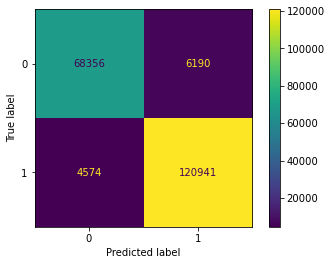

In [31]:
# evaluation

predictions = predict(X_test, model)

results['gamma_kmeans_accuracy'] = accuracy_score(y_test, predictions)
results['gamma_kmeans_predictions'] = predictions

ConfusionMatrixDisplay.from_predictions(y_test.values, predictions)
print(f"Accuracy = {accuracy_score(y_test.values, predictions)}")


### Results



## RESULTS ##


PCA: 

Time taken by built-in PCA:  3.9151167000090936
Time taken by gamma-based PCA:  2.60398709999572



Built-in Logistic Regression: 

Time taken by built-in Logistic Regression:  0.9781725000066217
Accuracy of built-in Logistic Regression:  0.9736580342995387
Confusion Matrix of built-in Logistic Regression: 
[[ 71742   2804]
 [  2466 123049]]


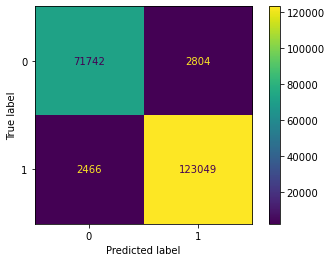



Gamma-based K-Means: 

Time taken by gamma-based K-Means:  11.213690299991868
Accuracy of gamma-based K-Means:  0.9461964100949211
Confusion Matrix of gamma-based K-Means: 
[[ 68356   6190]
 [  4574 120941]]


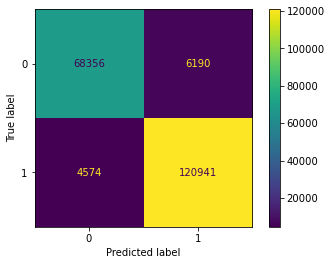

In [41]:
# printing results
print('\n\n## RESULTS ##\n\n')

# PCA
print('PCA: \n')
print('Time taken by built-in PCA: ', results['builtin_pca_time'])
print('Time taken by gamma-based PCA: ', results['gamma_pca_time'])

print('\n\n')

# Built-in LR
print('Built-in Logistic Regression: \n')
print('Time taken by built-in Logistic Regression: ', results['builtin_lr_time'])
print('Accuracy of built-in Logistic Regression: ', results['builtin_lr_accuracy'])
print('Confusion Matrix of built-in Logistic Regression: ')
print(confusion_matrix(y_test.values, results['builtin_lr_predictions']))
ConfusionMatrixDisplay.from_predictions(y_test.values, results['builtin_lr_predictions'])
plt.show()

print('\n')

# Gamma-based K-Means
print('Gamma-based K-Means: \n')
print('Time taken by gamma-based K-Means: ', results['gamma_kmeans_time'])
print('Accuracy of gamma-based K-Means: ', results['gamma_kmeans_accuracy'])
print('Confusion Matrix of gamma-based K-Means: ')
print(confusion_matrix(y_test.values, results['gamma_kmeans_predictions']))
ConfusionMatrixDisplay.from_predictions(y_test.values, results['gamma_kmeans_predictions'])
plt.show()
